In [7]:
import os
import pandas as pd
import warnings
#import matplotlib.pyplot as plt
import sys
import numpy as np
#import seaborn as sns

from tqdm import tqdm
#from random import randint
#from sklearn.model_selection import train_test_split
import time
#import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores

In [2]:
DEFAULT_LENGTH_Value = 60
STEP = 5

In [3]:


# key : value
# uniq_id : [60 values, label]

In [4]:
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value, step = STEP)
df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value, step = STEP)


Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 129.46it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 41.76it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 108.24it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.32it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.15it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.49it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.24it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 1415.51it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.93it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 34.86it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.04it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.69it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 46.87it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 29.85it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.64it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.84it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:03<00:00, 552.48it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1406.84it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1454.27it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 108.87it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 56.13it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 84.29it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 102.11it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 242.40it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 916.54it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 689.37it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 308.52it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|██████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 1277.06it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 1229.32it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 1090.71it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1428.04it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 1075.48it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 601.60it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 749.92it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 668.88it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 931.05it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 343.44it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 299.38it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


  0%|                                                                               | 1/5593 [00:00<1:16:30,  1.22it/s]

yes
yes


  1%|▍                                                                               | 28/5593 [00:01<03:20, 27.81it/s]

yes
yes
yes
yes
yes
yes


  1%|▊                                                                               | 59/5593 [00:01<01:19, 69.84it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes


  1%|▉                                                                               | 69/5593 [00:02<02:28, 37.11it/s]

yes
yes


  1%|█                                                                               | 76/5593 [00:02<03:31, 26.10it/s]

yes
yes
yes
yes
yes
yes


  1%|█▏                                                                              | 81/5593 [00:03<04:42, 19.54it/s]

yes


  2%|█▏                                                                              | 85/5593 [00:04<07:25, 12.38it/s]

yes
yes
yes


 13%|█████████▉                                                                    | 716/5593 [00:06<00:09, 515.25it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 15%|███████████▋                                                                  | 838/5593 [00:06<00:08, 552.30it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 16%|████████████▌                                                                 | 899/5593 [00:06<00:12, 367.67it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 17%|█████████████▍                                                                 | 948/5593 [00:11<01:52, 41.38it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 18%|█████████████▉                                                                 | 983/5593 [00:12<02:08, 35.75it/s]

yes
yes
yes


 19%|██████████████▊                                                               | 1062/5593 [00:12<01:14, 60.55it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 20%|███████████████▌                                                              | 1115/5593 [00:13<00:52, 85.37it/s]

yes
yes
yes
yes
yes
yes
yes


 23%|█████████████████▋                                                           | 1281/5593 [00:13<00:21, 200.88it/s]

yes
yes
yes
yes
yes
yes


 26%|████████████████████▏                                                        | 1467/5593 [00:13<00:10, 377.95it/s]

yes
yes


 30%|██████████████████████▊                                                      | 1656/5593 [00:13<00:07, 515.58it/s]

yes
yes


 32%|████████████████████████▍                                                    | 1777/5593 [00:14<00:06, 549.60it/s]

yes


 40%|██████████████████████████████▍                                              | 2215/5593 [00:14<00:05, 569.34it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 42%|████████████████████████████████                                             | 2333/5593 [00:15<00:05, 567.81it/s]

yes
yes
yes
yes
yes
yes
yes
yes


 45%|██████████████████████████████████▌                                          | 2509/5593 [00:15<00:05, 537.74it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 47%|████████████████████████████████████                                         | 2615/5593 [00:15<00:06, 483.60it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 49%|█████████████████████████████████████▍                                       | 2715/5593 [00:15<00:06, 479.45it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 51%|███████████████████████████████████████▌                                     | 2877/5593 [00:16<00:05, 503.59it/s]

yes
yes
yes
yes
yes
yes


 53%|█████████████████████████████████████████                                    | 2984/5593 [00:16<00:05, 515.10it/s]

yes
yes
yes
yes
yes


 57%|███████████████████████████████████████████▌                                 | 3167/5593 [00:16<00:04, 571.96it/s]

yes
yes
yes
yes
yes


 58%|████████████████████████████████████████████▍                                | 3227/5593 [00:16<00:04, 578.98it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes


 61%|██████████████████████████████████████████████▉                              | 3410/5593 [00:17<00:03, 565.82it/s]

yes
yes
yes
yes
yes
yes
yes


 63%|████████████████████████████████████████████████▌                            | 3529/5593 [00:17<00:03, 575.44it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 64%|█████████████████████████████████████████████████▍                           | 3587/5593 [00:17<00:03, 565.72it/s]

yes
yes
yes
yes
yes


 65%|██████████████████████████████████████████████████▏                          | 3644/5593 [00:17<00:05, 376.84it/s]

yes
yes
yes
yes


 66%|██████████████████████████████████████████████████▊                          | 3691/5593 [00:18<00:07, 265.68it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 67%|███████████████████████████████████████████████████▋                         | 3757/5593 [00:18<00:10, 177.93it/s]

yes
yes
yes
yes


 68%|████████████████████████████████████████████████████                         | 3782/5593 [00:18<00:11, 164.32it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 68%|████████████████████████████████████████████████████▋                        | 3829/5593 [00:19<00:08, 198.52it/s]

yes
yes
yes


 69%|█████████████████████████████████████████████████████                        | 3854/5593 [00:19<00:15, 114.52it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 78%|███████████████████████████████████████████████████████████▊                 | 4343/5593 [00:20<00:02, 474.34it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 80%|█████████████████████████████████████████████████████████████▎               | 4456/5593 [00:20<00:02, 510.03it/s]

yes
yes
yes
yes
yes


 82%|██████████████████████████████████████████████████████████████▉              | 4570/5593 [00:20<00:02, 476.85it/s]

yes
yes
yes
yes


 84%|████████████████████████████████████████████████████████████████▍            | 4680/5593 [00:21<00:01, 504.53it/s]

yes
yes
yes
yes


 86%|█████████████████████████████████████████████████████████████████▉           | 4792/5593 [00:21<00:01, 521.42it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 88%|███████████████████████████████████████████████████████████████████▍         | 4901/5593 [00:21<00:01, 474.75it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 89%|████████████████████████████████████████████████████████████████████▊        | 4996/5593 [00:21<00:01, 443.18it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 91%|██████████████████████████████████████████████████████████████████████       | 5090/5593 [00:22<00:01, 428.55it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 92%|██████████████████████████████████████████████████████████████████████▋      | 5134/5593 [00:22<00:01, 412.92it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 93%|███████████████████████████████████████████████████████████████████████▊     | 5220/5593 [00:22<00:00, 409.97it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 95%|█████████████████████████████████████████████████████████████████████████    | 5303/5593 [00:22<00:00, 390.61it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 96%|██████████████████████████████████████████████████████████████████████████▏  | 5387/5593 [00:22<00:00, 389.67it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 98%|███████████████████████████████████████████████████████████████████████████▎ | 5466/5593 [00:22<00:00, 373.21it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 99%|████████████████████████████████████████████████████████████████████████████▎| 5542/5593 [00:23<00:00, 341.81it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:23<00:00, 239.37it/s]


yes
yes
yes
yes
yes
yes
yes
yes
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.46it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.97it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.16it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1222.60it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 21.82it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|██████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 1227.96it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


  1%|▌                                                                                 | 5/765 [00:00<01:13, 10.31it/s]

yes
yes
yes
yes
yes
yes


  1%|▊                                                                                 | 7/765 [00:01<03:06,  4.06it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


  4%|███▎                                                                             | 31/765 [00:02<00:54, 13.51it/s]

yes


  4%|███▍                                                                             | 33/765 [00:06<02:42,  4.49it/s]

yes


  4%|███▌                                                                             | 34/765 [00:06<02:52,  4.24it/s]

yes


 16%|████████████▊                                                                   | 123/765 [00:06<00:12, 51.06it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 30%|███████████████████████▎                                                       | 226/765 [00:07<00:03, 137.06it/s]

yes
yes
yes
yes
yes
yes
yes


 36%|████████████████████████████▎                                                  | 274/765 [00:07<00:02, 181.45it/s]

yes
yes
yes
yes
yes
yes
yes
yes


 48%|█████████████████████████████████████▌                                         | 364/765 [00:07<00:02, 162.86it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 62%|█████████████████████████████████████████████████▎                             | 477/765 [00:08<00:01, 276.74it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 75%|███████████████████████████████████████████████████████████▏                   | 573/765 [00:08<00:00, 348.60it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 81%|████████████████████████████████████████████████████████████████▎              | 623/765 [00:08<00:00, 382.27it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


 93%|█████████████████████████████████████████████████████████████████████████▊     | 715/765 [00:08<00:00, 347.68it/s]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:08<00:00, 87.18it/s]


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [5]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,320.0,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_5,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,837.030303,933.424242,1029.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_10,644.242424,740.636364,837.030303,933.424242,1029.818182,849.363636,668.909091,488.454545,308.0,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_15,849.363636,668.909091,488.454545,308.0,258.0,318.823529,374.048588,429.273647,484.498705,539.723764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_20,318.823529,374.048588,429.273647,484.498705,539.723764,594.948822,650.173881,705.398939,760.623998,815.849057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,587.128781,537.9422,488.755619,439.569038,390.382457,341.195876,2458.325333,2424.260267,2390.1952,2356.130133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_30,341.195876,2458.325333,2424.260267,2390.1952,2356.130133,2322.065067,2288.0,1816.727273,1345.454545,874.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_35,2322.065067,2288.0,1816.727273,1345.454545,874.181818,1215.602484,342.197802,1027.632234,1713.066667,1521.530398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_40,1215.602484,342.197802,1027.632234,1713.066667,1521.530398,1329.99413,1138.457862,946.921593,755.385325,563.849057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


In [8]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

20221124_151137_4_0       messenger
20221124_151137_4_5       messenger
20221124_151137_4_10      messenger
20221124_151137_4_15      messenger
20221124_151137_4_20      messenger
                            ...    
20230117_121925_263_25      youtube
20230117_121925_263_30      youtube
20230117_121925_263_35      youtube
20230117_121925_263_40      youtube
20230117_121925_263_45      youtube
Name: label, Length: 30004, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.724918,-1.307060,-0.889479,-1.084955,-0.882825,-1.035505,-1.774165,-1.698825,-1.648139,-1.599471,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,messenger
20221117_125310_4_5,-1.028712,-1.766688,-1.697518,-1.646043,-1.600345,-1.504481,-1.435328,-1.361414,-1.307162,-1.253636,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,messenger
20221117_125310_4_10,-1.496665,-1.429028,-1.360156,-1.305332,-1.254033,-1.359769,-1.485755,-1.605441,-1.749628,-1.807450,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,messenger
20221117_125310_4_15,-1.352269,-1.479279,-1.604147,-1.747453,-1.808611,-1.734063,-1.693049,-1.646871,-1.624761,-1.605300,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,messenger
20221117_125310_4_20,-1.725747,-1.685853,-1.645572,-1.622684,-1.606183,-1.539258,-1.498926,-1.453565,-1.429413,-1.407169,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,-1.536871,-1.571032,-1.603936,-1.654445,-1.713490,-1.718279,-0.227751,-0.250246,-0.276548,-0.301950,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,youtube
20230124_124323_166_30,-1.709997,-0.225643,-0.249152,-0.275520,-0.301031,-0.320783,-0.347494,-0.675560,-1.015665,-1.365312,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,youtube
20230124_124323_166_35,-0.315548,-0.344970,-0.674403,-1.014062,-1.365863,-1.101389,-1.715440,-1.227980,-0.755593,-0.900811,...,-0.033536,-0.033611,-0.033553,-0.033617,-0.034641,-0.033976,-0.034089,-0.033933,-0.034038,youtube


In [9]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [10]:
# Train + Evaluate

In [11]:
time_counter = time.time_ns()

model = RandomForestClassifier()
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 142.4116808 s for a dataset length of 70046


In [12]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.9569828 s for a dataset length of 29980
Testing Duration per data : 0.03192070713809206 ms


normalized confusion matrix


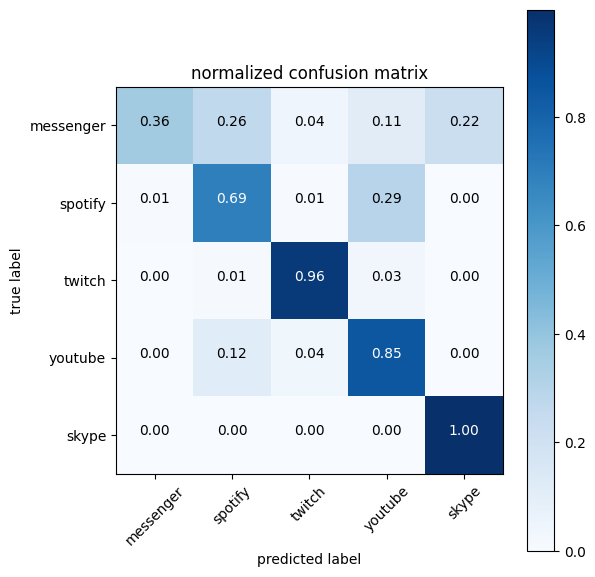

In [13]:
plot_confusion_matrix(true_labels,preds_labels)

In [14]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.7721120436995059,
 'Precision': 0.8358431328022778,
 'Recall': 0.528819212808539,
 'F1_Score': 0.5501419505767887,
 'support': None}